In [1]:
import os
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
# import tonic
import norse

c:\Users\camer\Documents\BEng-Thesis-Code\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
from metavision_core.event_io import EventsIterator
from metavision_core.event_io.raw_reader import RawReader

In [18]:
raw_path = "./data/1hzplane.raw"

mv_it = EventsIterator(raw_path, delta_t=10000, max_duration=int(1e6))
print(mv_it)  # show some metadata
print("Imager size : ", mv_it.get_size())


record_raw = RawReader(raw_path)
print("\n" + str(record_raw))  # show some metadata
print("Imager size : ", record_raw.get_size())

EventsIterator(./data/1hzplane.raw)
delta_t 10000 us
starts_ts 0 us end_ts 1000000
Imager size :  (480, 640)

RawReader(./data/1hzplane.raw)
current time : 0us done : False
current event index : 0
_begin_buffer 0,_end_buffer_ 0,  buffer_size 100000000
Imager size :  (480, 640)


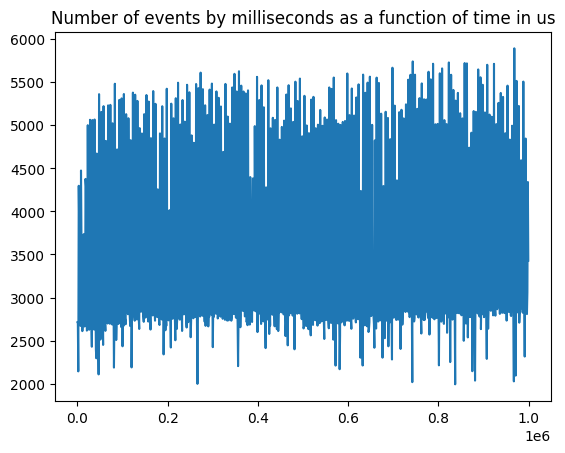

In [9]:
def ev_rate_computation_iterator():
    ev_rate_millisecond = np.zeros(int(1e6)//1000)  # we preallocate an array for the result
    for ev in EventsIterator(raw_path, delta_t=10000, max_duration=int(1e6)):
        # np.unique allow to do an histogram quickly
        index, counts = np.unique(ev['t'] // 1000, return_counts=True)
        # for each timestamp (in millisecond) in index, we get the number of events in counts
        ev_rate_millisecond[index.astype(int)] = counts
    return ev_rate_millisecond
ev_rate_millisecond = ev_rate_computation_iterator()

plt.plot(np.arange(int(1e6)//1000)* 1000, ev_rate_millisecond)
plt.title('Number of events by milliseconds as a function of time in us')
plt.show()

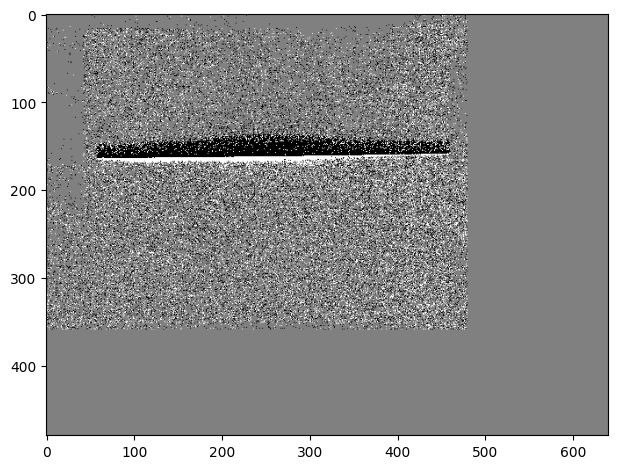

In [19]:
def viz_events(events, height, width):
    img = np.full((height, width, 3), 128, dtype=np.uint8)
    img[events['y'], events['x']] = 255 * events['p'][:, None]
    return img

%matplotlib inline
from matplotlib import pyplot as plt  # graphic library, for plots

height, width = record_raw.get_size()

# load the next 50 ms worth of events
events = record_raw.load_delta_t(50000)
im = viz_events(events, height, width)

plt.imshow(im)
plt.tight_layout()